In [12]:
output_dir = "output/"
# run.py
from mesa.batchrunner import BatchRunner
from ecosystem.model import EcoModel
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
start_time = time.time()


with_FL = True
if with_FL:
    config_file = "ecosystem/config_file.json"
else:
    config_file = "ecosystem/config_file_figure_3.json"

params = json.load(open(config_file))

#    return(stats_last.Vegetated)
m=0.2
b=0.55
d =  params["d"]

params = json.load(open(config_file))
delta = params["delta"]
c = params["c"]
r = params["r"]
d = params["d"]
f = params["f"]

if with_FL:
    #m_values = np.linspace(0,1,20)
    b_values = np.linspace(0.01,1,7)
    m_values = np.linspace(0.01,0.3,7)
    d_values = np.linspace(0.01,0.7,7)
    f_values = np.linspace(0.1,3,7)
    c_values = np.linspace(0.01,1,7)
    r_values = np.linspace(0.001,0.3,7)
    delta_values = np.linspace(0.1,1,7)
    alpha_f_values = np.linspace(0.1,2,7)
    alpha_b_values = np.linspace(0.1,2,7)


def evaluate_model(param_values):
        b, m, d,f,c,r,delta, alpha_f, alpha_b = param_values
        model = EcoModel(b, m, d,f,c,r,delta, alpha_f, alpha_b, config_file)
        for i in range(150):
            model.step()
        stats = model.datacollector.get_model_vars_dataframe()
        stats_last = stats.tail(1)
        return(stats_last)
        
        

In [25]:

for i in problem['bounds']:
    print("".join(str(i)))

[0.01, 1]
[0.01, 1]
[0.01, 0.3]
[0.01, 0.3]
[0.01, 0.7]
[0.01, 0.7]
[0.01, 0.3]
[0.01, 0.3]
[0.01, 1]
[0.01, 1]
[0.01, 0.3]
[0.01, 0.3]
[0.1, 1]
[0.1, 1]
[0.1, 2]
[0.1, 2]
[0.1, 2]
[0.1, 2]


In [172]:

from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np


problem = {
    'num_vars': 9,
    'names': ['b', 'm', 'd','f','c','r','delta', 'alpha_f', 'alpha_b' ],
    'bounds': [[0.01, 1],
               [0.01, 0.3],
               [0.01, 0.7],
               [0.01,0.3],
               [0.01,1],
                [0.01,0.3],
                [0.1,1],
               [0.1,2],
               [0.1,2]]
}

In [15]:
param_values = saltelli.sample(problem, 50)
param_values.shape

(1000, 9)

In [34]:
param_pd = pd.DataFrame(param_values)


In [35]:
param_pd.to_csv('output'+'params.csv')

In [10]:

#Y = np.zeros([param_valu es.shape[0]])
all_stats_salib = pd.DataFrame({}) 

for i, X in enumerate(param_values):
    all_stats_salib = all_stats_salib.append(evaluate_model(X))



/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/efiathieniti/Dropbox/UVA/ABM/abm/ecosystem/model.py:112: RuntimeWarning: invalid value encountered in double_scalars
  * self.d_s / ((1 - q_flowlength) ** 2 * self.L)


In [11]:
all_stats_salib.to_csv


,Degraded,Empty,Vegetated,b,flowlength,qminusminus,qminusplus,qplusplus
149,3683,3187,3130,0.227529,1.428065,0.747525,0.284105,0.445847
149,5622,4182,196,0.078643,16.377504,0.983731,0.419643,0.186224
149,3455,3111,3434,0.227529,1.203789,0.717408,0.273442,0.459668
149,2176,3927,3897,0.227529,0.986590,0.676798,0.173146,0.493841
149,4009,3113,2878,0.227529,1.559490,0.766358,0.318363,0.421821
149,4120,3472,2408,0.227529,2.024647,0.809273,0.303571,0.398671
149,7621,1377,1002,0.227529,5.361403,0.921983,0.537176,0.299401
149,3500,3119,3381,0.227529,1.142079,0.700861,0.295475,0.414374
149,3659,3287,3054,0.227529,1.465150,0.753311,0.281434,0.438933
149,3634,3228,3138,0.227529,1.394372,0.745482,0.272945,0.443435


In [14]:
all_stats_salib.to_csv('output/'+ "salib_all_stats_%s.csv"%(len(params)))

In [26]:
#Y = Ishigami.evaluate(param_values)
all_stats_salib['total'] = (all_stats_salib.Degraded+all_stats_salib.Vegetated+all_stats_salib.Empty)

Y = all_stats_salib.Vegetated / all_stats_salib.total


In [192]:
all_stats_salib = pd.read_csv('output/'+ "salib_all_stats_19.csv")
all_stats_salib['total'] = (all_stats_salib.Degraded+all_stats_salib.Vegetated+all_stats_salib.Empty)


Y_veg = all_stats_salib.Vegetated / all_stats_salib.total
Y_clus= all_stats_salib.qplusplus/(all_stats_salib.Vegetated/(all_stats_salib.total))
print(Y_veg[10],Y_clus[10])

0.1526 1.70053712925


In [193]:
Y_clus=np.array(Y_clus)
Y_veg = np.array(Y_veg)

In [194]:
Y_clus


array([  1.42443018e+00,   9.50124948e+00,   1.33857899e+00,
         1.26723484e+00,   1.46567307e+00,   1.65561087e+00,
         2.98803590e+00,   1.22559729e+00,   1.43723820e+00,
         1.41311443e+00,   1.70053713e+00,   1.15055884e+01,
         8.48800362e+00,   5.73602222e+00,   5.03905266e+00,
         3.76433388e+00,   1.06811523e+01,   6.94444444e+00,
         5.69328710e+00,   7.80437045e+00,   1.09109048e+00,
         1.16129333e+00,   1.07524844e+00,              nan,
         1.06331465e+00,   1.10390181e+00,   1.08309115e+00,
         1.02318075e+00,   1.07858816e+00,   1.06542800e+00,
         2.62904874e+00,              nan,   1.05681003e+00,
                    nan,   0.00000000e+00,              nan,
                    nan,              nan,              nan,
                    nan,   1.66086759e+00,   3.83158833e+00,
                    nan,   1.13097080e+00,   7.22488079e+00,
         1.16706470e+00,   1.06416623e+00,   1.86280669e+00,
         1.64003379e+00,

In [186]:
Y_veg

array([  3.13000000e-01,   1.96000000e-02,   3.43400000e-01,
         3.89700000e-01,   2.87800000e-01,   2.40800000e-01,
         1.00200000e-01,   3.38100000e-01,   3.05400000e-01,
         3.13800000e-01,   1.52600000e-01,   7.80000000e-03,
         9.40000000e-03,   1.82000000e-02,   1.26000000e-02,
         4.61000000e-02,   1.28000000e-02,   1.20000000e-02,
         1.39000000e-02,   1.24000000e-02,   4.30700000e-01,
         3.16800000e-01,   4.41300000e-01,   0.00000000e+00,
         4.47200000e-01,   4.08100000e-01,   4.37700000e-01,
         4.49300000e-01,   4.36600000e-01,   4.37200000e-01,
         2.58000000e-02,   0.00000000e+00,   3.10900000e-01,
         0.00000000e+00,   3.00000000e-04,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   2.48000000e-01,   6.70000000e-02,
         0.00000000e+00,   4.98900000e-01,   3.43000000e-02,
         5.00500000e-01,   5.91800000e-01,   2.43500000e-01,
         2.48100000e-01,

In [195]:
# Compute sensitivity indices
Si = sobol.analyze(problem, Y_clus)
Si_2 =  sobol.analyze(problem, Y_veg)

In [196]:

Si_2

{'S1': array([ 0.10283104,  0.37487069,  0.11634643,  0.02094526,  0.07838594,
         0.05946997, -0.0183123 , -0.0012987 , -0.00292242]),
 'S1_conf': array([ 0.27255349,  0.32126657,  0.15841558,  0.04354772,  0.09463985,
         0.0640453 ,  0.01514268,  0.00719142,  0.00486102]),
 'S2': array([[        nan,  0.17949226,  0.24042945,  0.12656293,  0.09796924,
          0.16473717,  0.13610165,  0.13071757,  0.13308166],
        [        nan,         nan,  0.01520984, -0.06330108,  0.04734448,
          0.04284763, -0.00295509, -0.01656697, -0.00927383],
        [        nan,         nan,         nan, -0.06294012, -0.07287383,
         -0.0840999 , -0.06999542, -0.07284681, -0.07756737],
        [        nan,         nan,         nan,         nan, -0.01716496,
         -0.01732888, -0.02373924, -0.02476224, -0.02423416],
        [        nan,         nan,         nan,         nan,         nan,
         -0.06635103, -0.05800644, -0.05796612, -0.06086471],
        [        nan,      

In [3]:
#loaded = pd.DataFrame.read_csv('output/'+ "SI_1000.csv")

AttributeError: type object 'DataFrame' has no attribute 'read_csv'

In [197]:
#Here, we see that m exhibits first-order sensitivities but 
#m,d appears to have no first-order effects.
print("First order indices")
print("'names': ['b', 'm', 'd','f','c','r','delta', 'alpha_f', 'alpha_b' ")
print(Si['S1'])
#   'names': ['b', 'm', 'd','f','c','r','delta', 'alpha_f', 'alpha_b' ],

# x1-x3 (b-d) has the highest interaction
print(Si['ST'])


First order indices
'names': ['b', 'm', 'd','f','c','r','delta', 'alpha_f', 'alpha_b' 
[ nan  nan  nan  nan  nan  nan  nan  nan  nan]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan]


In [198]:
Si['S1_conf']

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

In [142]:
matplotlib.rcParams.update({'font.size': 13})


In [144]:
plt.show()

0.733238324715


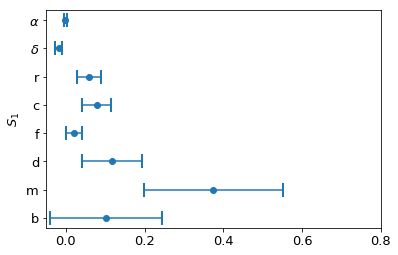

In [183]:
fig, ax = plt.subplots()
L = len(Si['S1'])
names = ['b', 'm', 'd','f','c','r','delta', 'alpha_f', 'alpha_b']
y = np.arange(0,L)
print(np.sum(Si['S1'][0:L-1]))

plt.errorbar(x=Si['S1'][0:L-1],y=y[0:L-1], xerr=(Si['S1_conf']/2)[0:L-1], fmt='o', capthick=2,capsize=7)
ax.set_yticklabels(('o','b', 'm', 'd','f','c','r',r'$\delta$', r'$\alpha$'))
plt.ylabel('$S_1$')
plt.xlim([-0.05,0.8])
#plt.savefig('output/'+'Sobol_S1_rplus.png', type = 'png')
plt.show()

In [154]:
L

9

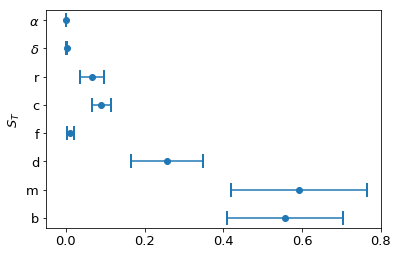

In [162]:
fig, ax = plt.subplots()
L = len(Si['ST'])
names = ['b', 'm', 'd','f','c','r','delta', 'alpha_f', 'alpha_b']
y = np.arange(0,L)

plt.errorbar(x=Si['ST'][0:L-1],y=y[0:L-1], xerr=(Si['ST_conf']/2)[0:L-1], fmt='o', capthick=2,capsize=7)
ax.set_yticklabels(('o','b', 'm', 'd','f','c','r',r'$\delta$', r'$\alpha$', 'alpha_b'))
plt.ylabel('$S_T$')
plt.xlim([-0.05,0.8])
#plt.savefig('output/'+'Sobol_ST_rplus.png', type = 'png')
plt.show()


In [30]:
# b,m,d

interactions = pd.DataFrame(Si['S2'])
print("x1-x2:", Si['S2'][0,1])
print("x1-x3:", Si['S2'][0,2])
print("x1-x3:", Si['S2'][0,3])
print("x1-x3:", Si['S2'][0,4])
print("x1-x3:", Si['S2'][0,4])
print("x1-x3:", Si['S2'][1,7])

print("x2-x3:", Si['S2'][1,2])
print("x2-x3:", Si['S2'][1,2])




x1-x2: 0.179492259325
x1-x3: 0.240429454374
x1-x3: 0.126562934785
x1-x3: 0.0979692383599
x1-x3: 0.0979692383599
x1-x3: -0.0165669691107
x2-x3: 0.0152098440179
x2-x3: 0.0152098440179


In [31]:
interactions

,0,1,2,3,4,5,6,7,8
0,NaN,0.179492,0.240429,0.126563,0.097969,0.164737,0.136102,0.130718,0.133082
1,NaN,NaN,0.015210,-0.063301,0.047344,0.042848,-0.002955,-0.016567,-0.009274
2,NaN,NaN,NaN,-0.062940,-0.072874,-0.084100,-0.069995,-0.072847,-0.077567
3,NaN,NaN,NaN,NaN,-0.017165,-0.017329,-0.023739,-0.024762,-0.024234
4,NaN,NaN,NaN,NaN,NaN,-0.066351,-0.058006,-0.057966,-0.060865
5,NaN,NaN,NaN,NaN,NaN,NaN,-0.057850,-0.060448,-0.061445
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030049,0.030266
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013688
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
